# Adult Dataset Analysis


## 1. Introduction


#### The Adult dataset, also known as the "Census Income" dataset, is utilized for predicting whether an individual earns more than $50,000 annually based on demographic attributes. This notebook documents the comprehensive process of analyzing the dataset, including data loading, cleaning, feature engineering, and visualization. Each step is explained in detail to provide clarity on the methods used and the rationale behind them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


## Data Loading and Initial Exploration


#### This is to understand the structure of the dataset and identify initial issues such as missing values.



In [2]:
# Replace 'path_to_your_file' with the actual path if the file is not in the current directory
file_path = 'adult.data'


In [3]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

adult_df = pd.read_csv(file_path, names=column_names, na_values=' ?')


In [4]:

# Print the first few rows to ensure the dataset is loaded correctly
print(adult_df.head(4))


   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   

        marital-status          occupation    relationship    race    sex  \
0        Never-married        Adm-clerical   Not-in-family   White   Male   
1   Married-civ-spouse     Exec-managerial         Husband   White   Male   
2             Divorced   Handlers-cleaners   Not-in-family   White   Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black   Male   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3    

In [5]:
print(adult_df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [6]:
# Count the number of categorical columns
categorical_columns = adult_df.select_dtypes(include=['category', 'object']).columns
num_categorical_columns = len(categorical_columns)

print(f"Number of categorical columns: {num_categorical_columns}")
print("Categorical columns:", list(categorical_columns))


Number of categorical columns: 9
Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [7]:
# Get the number of rows in the dataset
num_rows = adult_df.shape[0]

print(f"Number of rows: {num_rows}")


Number of rows: 32561


In [8]:
# Check for null values
null_values = adult_df.isnull().sum()

print(null_values)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


#### From the code, we can see missing values are present in workclass, occupation, and native-country.


## 3. Data Cleaning


#### This is to handle missing values and make the dataset suitable for analysis and modeling.



In [9]:
# Load the dataset again to revert the previous changes
adult_df = pd.read_csv(file_path, names=column_names, na_values=' ?')

# Impute missing values with the most frequent category for 'workclass' and 'occupation'
# Missing values in workclass and occupation are imputed with the mode (most frequent value) to ensure 
# no data is lost and maintain the distribution.
for column in ['workclass', 'occupation']:
    most_frequent = adult_df[column].mode()[0]
    adult_df[column].fillna(most_frequent, inplace=True)


# Remove rows with missing values for 'native-country'
# Rows with missing native-country are dropped since this column is essential 
# for analysis and imputation might introduce bias.
adult_df.dropna(subset=['native-country'], inplace=True)

# Group rare categories in 'native-country'
# Rare categories in native-country are grouped into "Other" to prevent overfitting and maintain model performance.
threshold = 100
value_counts = adult_df['native-country'].value_counts()
to_replace = value_counts[value_counts < threshold].index
adult_df['native-country'] = adult_df['native-country'].replace(to_replace, 'Other')

# Display unique values in 'native-country' after grouping
print(adult_df['native-country'].value_counts())


native-country
 United-States    29170
Other              1389
 Mexico             643
 Philippines        198
 Germany            137
 Canada             121
 Puerto-Rico        114
 El-Salvador        106
 India              100
Name: count, dtype: int64


/tmp/ipykernel_6627/2876890378.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_df[column].fillna(most_frequent, inplace=True)


In [10]:
# Check for null values
null_values = adult_df.isnull().sum()

print(null_values)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


## 4. Feature Engineering


### One-Hot Encoding

#### Categorical features are converted into binary columns representing each category. This method is used to convert categorical data into a format suitable for machine learning algorithms that require numerical input

In [11]:

# One-Hot Encoding for categorical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = onehot_encoder.fit_transform(adult_df[categorical_features])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(categorical_features))


### Label Encoding

#### Converts the target variable income into binary values (0 and 1) for classification models. This transformation is necessary for algorithms that work with numerical labels.

In [21]:

# Label Encoding for the target variable
label_encoder = LabelEncoder()
adult_df['income'] = label_encoder.fit_transform(adult_df['income'])

### Feature Combination

####  Joins the one-hot encoded features with the remaining numerical columns. This results in a dataset where all features are in a format compatible with machine learning models.

In [13]:

# Combine the encoded features with the rest of the dataset
adult_df = pd.concat([adult_df.drop(columns=categorical_features), encoded_df], axis=1)

# Display the first few rows of the transformed dataset
print(adult_df.head(3))

    age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  39.0   77516.0           13.0        2174.0           0.0            40.0   
1  50.0   83311.0           13.0           0.0           0.0            13.0   
2  38.0  215646.0            9.0           0.0           0.0            40.0   

   income  workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
0   <=50K                   0.0                      0.0                 0.0   
1   <=50K                   0.0                      0.0                 0.0   
2   <=50K                   0.0                      0.0                 1.0   

   ...  race_ White  sex_ Male  native-country_ El-Salvador  \
0  ...          1.0        1.0                          0.0   
1  ...          1.0        1.0                          0.0   
2  ...          1.0        1.0                          0.0   

   native-country_ Germany  native-country_ India  native-country_ Mexico  \
0                      0.0  

###  Feature Creation

#### A new feature education_workclass is constructed by combining one-hot encoded columns of education and workclass. This might reveal interactions between these attributes that are relevant for prediction.

In [14]:
# Create a new feature combining all education and workclass one-hot encoded columns
# First, extract the columns related to education and workclass
education_columns = [col for col in adult_df.columns if col.startswith('education_')]
workclass_columns = [col for col in adult_df.columns if col.startswith('workclass_')]

# Create a new column 'education_workclass' by combining the encoded features
# Here, we join the values in each row from the selected columns
adult_df['education_workclass'] = adult_df[education_columns].astype(str).agg('_'.join, axis=1) + '_' + \
                                  adult_df[workclass_columns].astype(str).agg('_'.join, axis=1)

# Display the first few rows of the dataset with the new feature
print(adult_df[['education_workclass']].head())

                                 education_workclass
0  0.0_0.0_0.0_0.0_0.0_0.0_0.0_0.0_1.0_0.0_0.0_0....
1  0.0_0.0_0.0_0.0_0.0_0.0_0.0_0.0_1.0_0.0_0.0_0....
2  0.0_0.0_0.0_0.0_0.0_0.0_0.0_0.0_0.0_0.0_1.0_0....
3  1.0_0.0_0.0_0.0_0.0_0.0_0.0_0.0_0.0_0.0_0.0_0....
4  0.0_0.0_0.0_0.0_0.0_0.0_0.0_0.0_1.0_0.0_0.0_0....


## 5. Data Visualization


### Age Distribution by Income

#### Shows how age is distributed across different income levels thus Provides insight into the age demographics of high and low-income individuals.

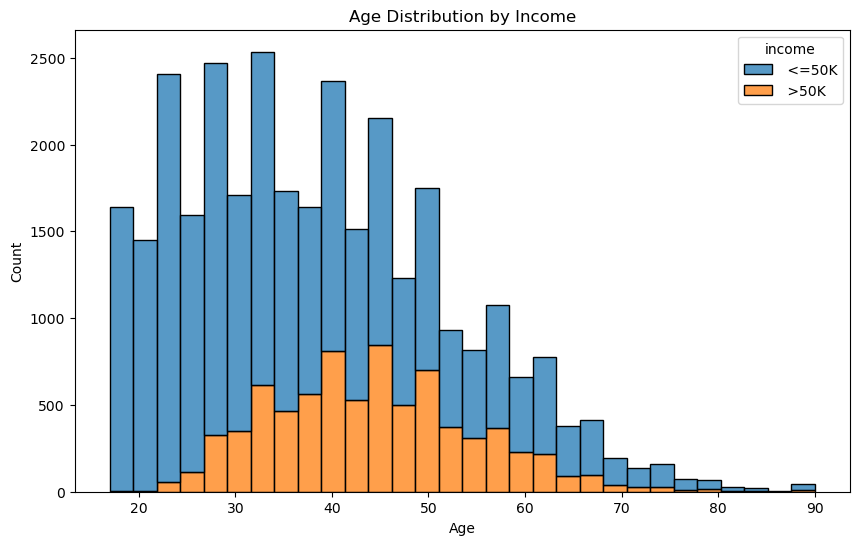

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=adult_df, x='age', hue='income', multiple='stack', bins=30)
plt.title('Age Distribution by Income')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


#### Hours Worked per Week

#### Displays the distribution of hours worked per week, helping understand work patterns and their potential correlation with income.


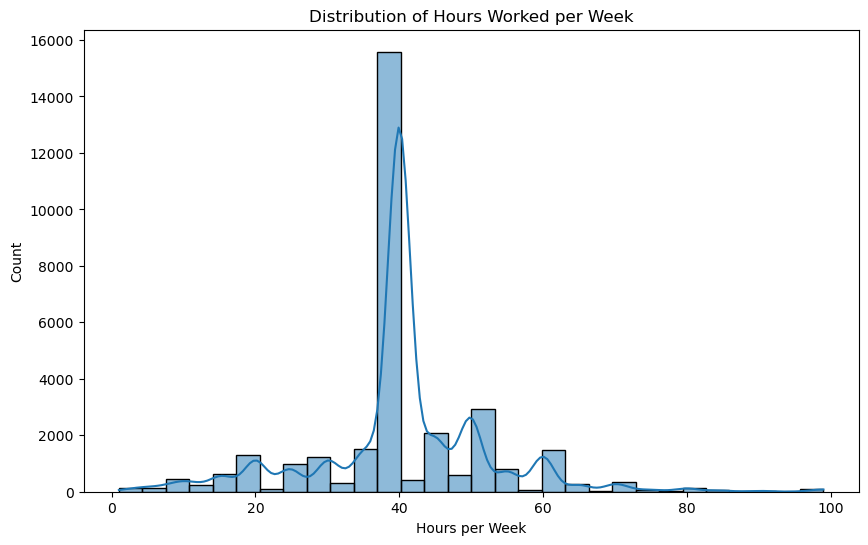

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(adult_df['hours-per-week'], bins=30, kde=True)
plt.title('Distribution of Hours Worked per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.show()


### Average Hours Worked per Week by Income

#### Compares average hours worked per week by income level. Shows how work intensity varies with income.

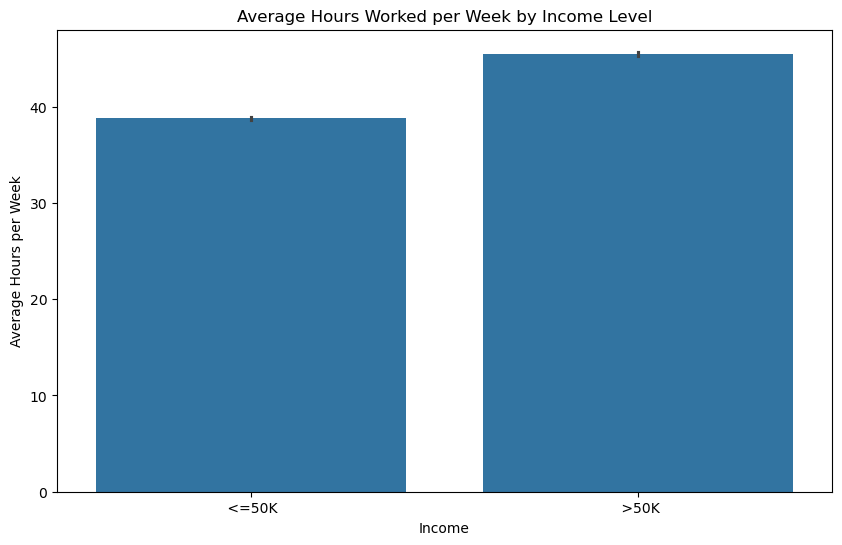

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='income', y='hours-per-week', data=adult_df, estimator='mean')
plt.title('Average Hours Worked per Week by Income Level')
plt.xlabel('Income')
plt.ylabel('Average Hours per Week')
plt.show()


### Native-Country Distribution

#### Displays the distribution of native countries, reflecting the grouping of rare categories thus helps understand the diversity of the dataset and its representation.

/tmp/ipykernel_6627/2716573980.py:2: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  adult_df['native-country'] = adult_df.filter(like='native-country_').idxmax(axis=1).str.replace('native-country_', '')


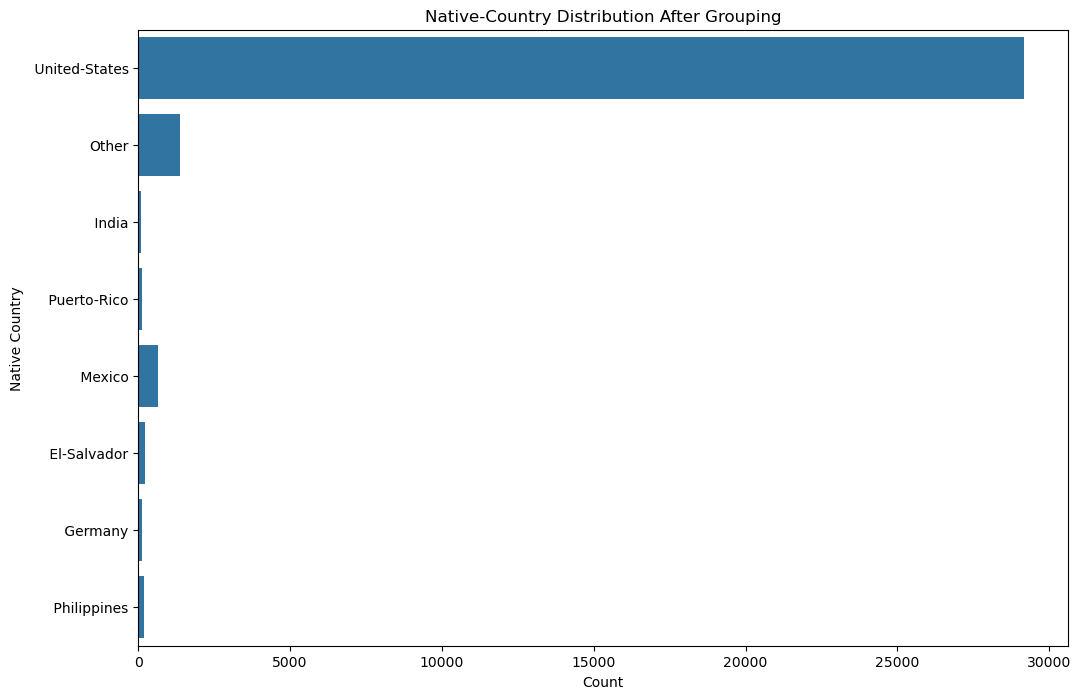

In [18]:
# Recreate the 'native-country' column from the one-hot encoded columns
adult_df['native-country'] = adult_df.filter(like='native-country_').idxmax(axis=1).str.replace('native-country_', '')

# Plot distribution after grouping
plt.figure(figsize=(12, 8))
sns.countplot(y='native-country', data=adult_df)
plt.title('Native-Country Distribution After Grouping')
plt.xlabel('Count')
plt.ylabel('Native Country')
plt.show()


### Workclass Distribution

#### This was to understand the distribution of workclass categories in the dataset.

##### Imputed missing values in the workclass column, applied one-hot encoding to create numerical representations, and aggregated the encoded columns to visualize the distribution using a bar plot. This approach ensures all workclass categories are used and represented accurately.

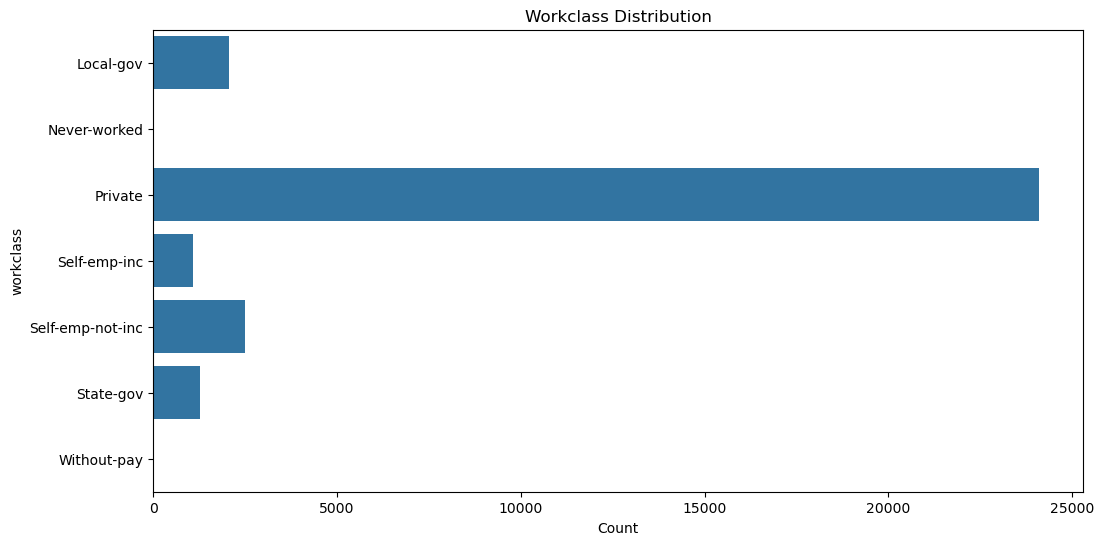

In [19]:


# Aggregate counts for each workclass category
workclass_counts = adult_df.filter(like='workclass_').sum().reset_index()
workclass_counts.columns = ['workclass', 'Count']

# Map the original workclass labels for clarity
workclass_mapping = {
    'workclass_ Local-gov': 'Local-gov',
    'workclass_ Never-worked': 'Never-worked',
    'workclass_ Private': 'Private',
    'workclass_ Self-emp-inc': 'Self-emp-inc',
    'workclass_ Self-emp-not-inc': 'Self-emp-not-inc',
    'workclass_ State-gov': 'State-gov',
    'workclass_ Without-pay': 'Without-pay'
}

workclass_counts['workclass'] = workclass_counts['workclass'].map(workclass_mapping)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=workclass_counts, y='workclass', x='Count', order=workclass_counts['workclass'])
plt.title('Workclass Distribution')
plt.xlabel('Count')
plt.ylabel('workclass')
plt.show()


### Income by Marital Status

#### This was to analyze the relationship between income and marital status categories.



##### Imputed missing values in the marital-status column, applied one-hot encoding, and aggregated the encoded columns. This method ensures all marital status categories are used and represented accurately.

In [20]:


# Aggregate counts for each marital-status category
marital_status_counts = adult_df.filter(like='marital-status_').sum().reset_index()
marital_status_counts.columns = ['marital-status', 'Count']

# Map the original marital status labels for clarity
marital_status_mapping = {
    'marital-status_ Married-AF-spouse': 'Married-AF-spouse',
    'marital-status_ Married-civ-spouse': 'Married-civ-spouse',
    'marital-status_ Married-spouse-absent': 'Married-spouse-absent',
    'marital-status_ Never-married': 'Never-married',
    'marital-status_ Separated': 'Separated',
    'marital-status_ Widowed': 'Widowed'
}

marital_status_counts['marital-status'] = marital_status_counts['marital-status'].map(marital_status_mapping)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=marital_status_counts, x='marital-status', y='Count')
plt.title('Income by Marital Status')
plt.xlabel('marital-status')
plt.ylabel('Count')
plt.xticks(rotation=45)5. Data Visualization

plt.show()


SyntaxError: invalid syntax (2199559833.py, line 23)

### Correlation Heatmap

#### To visualize the correlation between numerical features in the dataset.



In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = adult_df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
